In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn,optim
from torch.autograd import Variable

D:\Work\Anaconda3\envs\bert\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


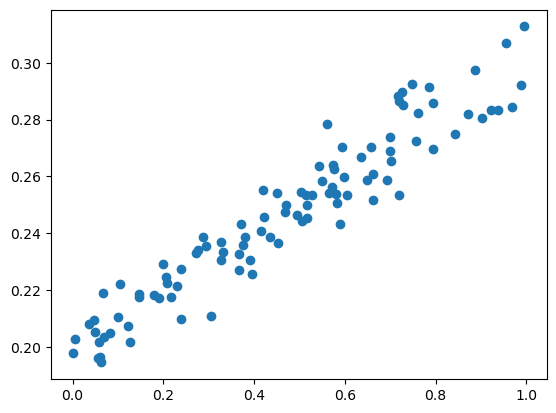

In [128]:
x_data = np.random.rand(100)
noise = np.random.normal(0, 0.01, x_data.shape)
y_data = x_data * 0.1 + 0.2 + noise

plt.scatter(x_data, y_data)
plt.show()

In [129]:
x_data = x_data.reshape(-1, 1) #-1表示自动匹配，这里意思也就是100行，1列
y_data = y_data.reshape(-1 ,1)

In [130]:
#把numpy变成tensor
x_data = torch.FloatTensor(x_data)
x_data.requires_grad = False
y_data = torch.FloatTensor(y_data)
y_data.requires_grad = False

In [131]:
#构建神经网络模型
#一般把网络中具有可学习参数的层放在它的初始化的函数中
class LinerRegression(nn.Module):
    def __init__(self):
        #继承父类
        super(LinerRegression, self).__init__()
        self.fc = nn.Linear(1, 1)
        #定义网络的计算
    def forward(self, x):
        out = self.fc(x)
        return out

In [132]:
#实例化模型
model = LinerRegression()
#定义损失函数
mse_loss = nn.MSELoss()
#定义优化器
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [133]:
for name, parameters in model.named_parameters():
    print('name:{},param:{}'.format(name, parameters))

name:fc.weight,param:Parameter containing:
tensor([[-0.7348]], requires_grad=True)
name:fc.bias,param:Parameter containing:
tensor([-0.5884], requires_grad=True)


In [134]:
for i in range(10001):
    out = model(x_data)
    #计算loss
    loss = mse_loss(out, y_data)
    #梯度清0
    optimizer.zero_grad()
    #计算梯度
    loss.backward()
    #修改权值
    optimizer.step()
    if i % 200 == 0:
        print(i, loss.item())

0 1.4351446628570557
200 0.006043936591595411
400 0.0037519813049584627
600 0.0023656352423131466
800 0.0015017135301604867
1000 0.000963345926720649
1200 0.000627854373306036
1400 0.00041878712363541126
1600 0.0002885039139073342
1800 0.0002073155774269253
2000 0.0001567218278069049
2200 0.00012519366282504052
2400 0.00010554622713243589
2600 9.330272587249056e-05
2800 8.567303302697837e-05
3000 8.091848576441407e-05
3200 7.795554847689345e-05
3400 7.610913598909974e-05
3600 7.495856698369607e-05
3800 7.42415722925216e-05
4000 7.379474845947698e-05
4200 7.351629028562456e-05
4400 7.334280235227197e-05
4600 7.323466707020998e-05
4800 7.31673208065331e-05
5000 7.31253094272688e-05
5200 7.309913780773059e-05
5400 7.30828323867172e-05
5600 7.30726751498878e-05
5800 7.306635234272107e-05
6000 7.306240149773657e-05
6200 7.305996405193582e-05
6400 7.305842154892161e-05
6600 7.305748295038939e-05
6800 7.305685721803457e-05
7000 7.305648614419624e-05
7200 7.305626786546782e-05
7400 7.305611507

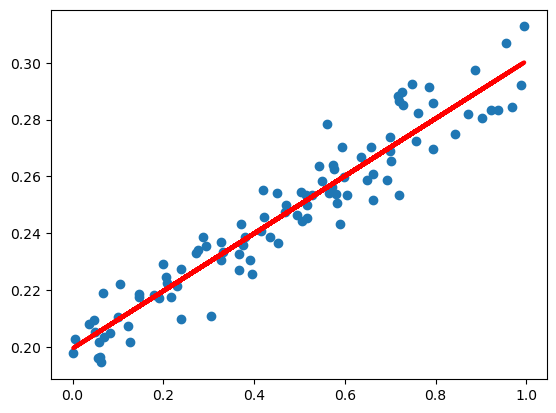

In [135]:
y_pred = model(x_data)
# loss = mse_loss(y_pred, y_data)
# print(loss.item())
plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred.data, 'r-', lw = 3)
plt.show()